In [1]:
! pip install pydlm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 7.3 MB/s eta 0:00:00


In [2]:
# Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from pydlm import dlm, trend, seasonality, dynamic
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv('/content/BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,10198.599609,11046.700195,9694.650391,10975.599609,10975.599609,6783119872
2017-12-02,10978.299805,11320.200195,10905.099609,11074.599609,11074.599609,5138500096
2017-12-03,11082.700195,11858.700195,10862.000000,11323.200195,11323.200195,6608309760
2017-12-04,11315.400391,11657.200195,11081.799805,11657.200195,11657.200195,6132409856
2017-12-05,11685.700195,12032.000000,11604.599609,11916.700195,11916.700195,6895260160


In [4]:
# Đọc file csv và gắng index với giá Close
df = df[['Close']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index

In [5]:
# # Scaler data
scaler=RobustScaler()
df_new = scaler.fit_transform(df)

In [18]:
# Define the lengths of train, validation, and test sets
train_size = int(0.5* len(df_new))
test_size = int(0.3 * len(df_new))
val_size = len(df_new) - train_size - test_size

# Split the dataset into train, validation, and test sets
train_data = df_new[:train_size]
test_data = df_new[train_size:train_size + test_size]
val_data = df_new[train_size + test_size:]


In [19]:
# construct the base
myDLM = dlm(train_data)
# adding model components
# add a first-order trend (linear trending) with prior covariance 1.0
linear_trend = trend(degree=1, discount=0.95, name='linear_trend', w=10)
# A seasonality
seasonal52 = seasonality(period=52, discount=0.99, name='seasonal52', w=10)
myDLM = myDLM + linear_trend + seasonal52


In [20]:
myDLM.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [21]:
# predict test
y_test_pred = myDLM.predictN(N=len(test_data))
y_test_pred = y_test_pred[0]
y_test_pred = np.array(y_test_pred).reshape(-1,1)

In [22]:
# predict val
y_val_pred = myDLM.predictN(N=len(val_data))
y_val_pred = y_val_pred[0]
y_val_pred = np.array(y_val_pred).reshape(-1,1)

In [ ]:
# predict 30 days
y_pred_30days = myDLM.predictN(N=30)
y_pred_30days= y_pred_30days[0]
y_pred_30days = np.array(y_pred_30days).reshape(-1,1)

In [ ]:
print(y_pred_30days)

[[1.6587125 ]
 [1.65450921]
 [1.62174894]
 [1.62963939]
 [1.58499526]
 [1.66032301]
 [1.68582217]
 [1.72263855]
 [1.71758754]
 [1.73369699]
 [1.77137241]
 [1.77082699]
 [1.7675663 ]
 [1.74336017]
 [1.81504094]
 [1.81950141]
 [1.83308072]
 [1.77836724]
 [1.77441121]
 [1.79002563]
 [1.8316076 ]
 [1.91117403]
 [1.89061956]
 [1.87431832]
 [1.88524983]
 [1.82211906]
 [1.84631963]
 [1.80081807]
 [1.81636272]
 [1.80759643]]


**Đánh giá trên tập Test với tỉ lệ 5:3:2**

In [23]:
mse = mean_squared_error(test_data, y_test_pred)
rmse =np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = mean_absolute_percentage_error(test_data, y_test_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 1.1602445892647015
RMSE: 1.077146503157626
MAE: 0.9248192081460449
MAPE: 0.7413994944123461


**Đánh giá trên tập Test với tỉ lệ 6:2:2**

In [17]:
mse = mean_squared_error(test_data, y_test_pred)
rmse =np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = mean_absolute_percentage_error(test_data, y_test_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 19.43714667600221
RMSE: 4.408757951623361
MAE: 3.927806436756266
MAPE: 2.882739447019749


**Đánh giá trên tập Test với tỉ lệ 7:2:1**

In [11]:
mse = mean_squared_error(test_data, y_test_pred)
rmse =np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)
mape = mean_absolute_percentage_error(test_data, y_test_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 7.847662000673385
RMSE: 2.801367880281593
MAE: 2.421830806829701
MAPE: 5.745003966035213


In [ ]:
from datetime import datetime, timedelta
start_date = datetime(2023, 4, 26)
end_date = datetime(2023, 5, 25)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

**Nếu đang làm tỉ lệ 7:2:1 thì chạy cái này trước khi vẽ biểu đồ**

In [ ]:
train_size1 = int(0.7 * len(df))
test_size1 = int(0.2 * len(df))
val_size1 = len(df) - train_size - test_size

train_data1 = df[:train_size]
test_data1 = df[train_size:train_size+test_size]
val_data1 = df[train_size+test_size:]

 **Nếu đang làm tỉ lệ 6:2:2 thì chạy cái này trước khi vẽ biểu đồ**

In [ ]:
train_size2 = int(0.6 * len(df))
test_size2 = int(0.2 * len(df))
val_size2 = len(df) - train_size - test_size

train_data2 = df[:train_size]
test_data2 = df[train_size:train_size+test_size]
val_data2 = df[train_size+test_size:]

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 6:2:2**


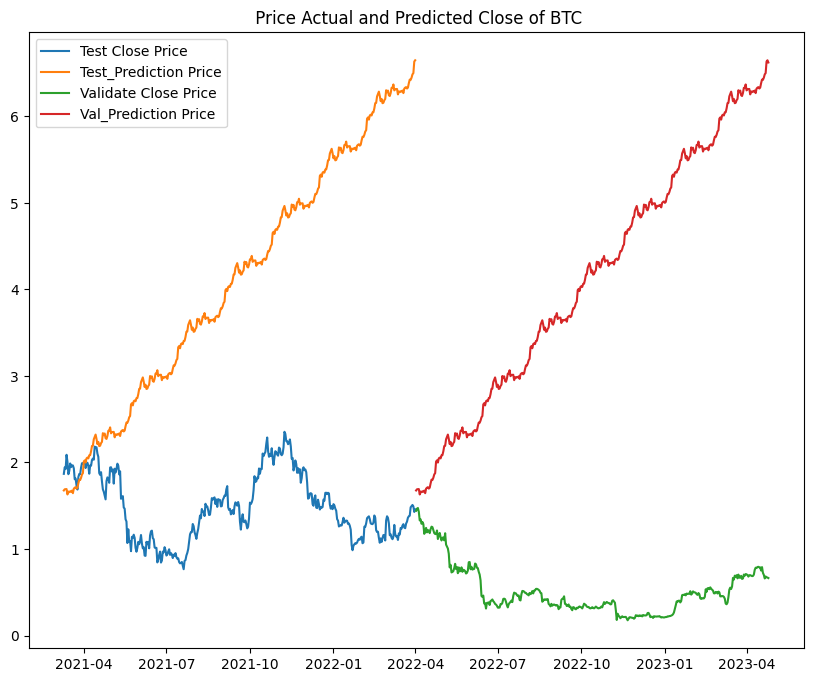

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(test_data2.index, test_data , label = 'Test Close Price')
plt.plot(test_data2.index, y_test_pred , label = 'Test_Prediction Price')
plt.plot(val_data2.index, val_data, label = 'Validate Close Price')
plt.plot(val_data2.index, y_val_pred, label = 'Val_Prediction Price')
plt.legend()
plt.show()

**Vẽ đồ thị so sánh giá trị thực tế và giá trị dự đoán trên tập TEST VÀ Validate tỉ lệ 7:2:1**


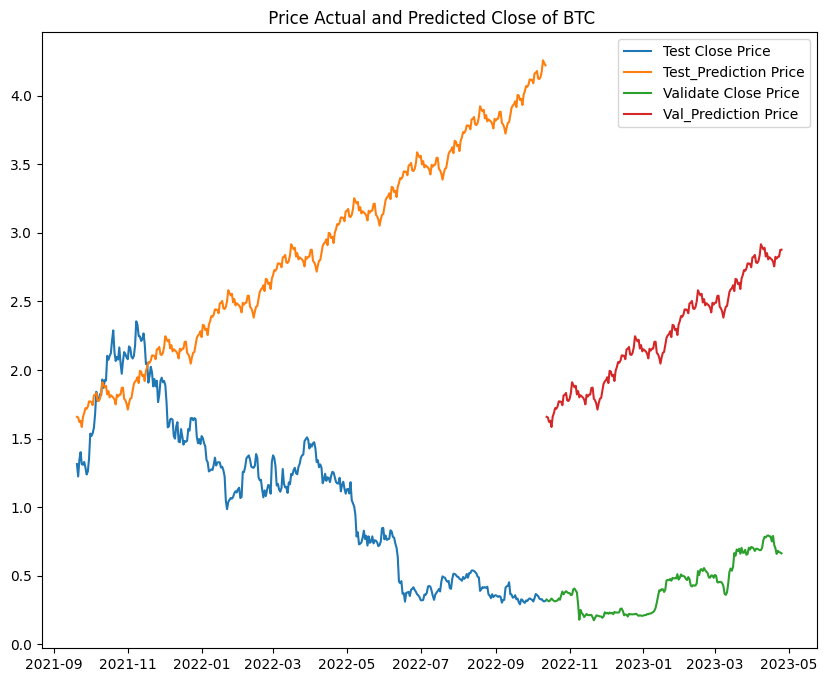

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.title(' Price Actual and Predicted Close of BTC')
plt.plot(test_data1.index, test_data , label = 'Test Close Price')
plt.plot(test_data1.index, y_test_pred , label = 'Test_Prediction Price')
plt.plot(val_data1.index, val_data, label = 'Validate Close Price')
plt.plot(val_data1.index, y_val_pred, label = 'Val_Prediction Price')
plt.legend()
plt.show()

**Biểu đồ dự đoán 30 ngày với tỉ lệ 7:2:1**

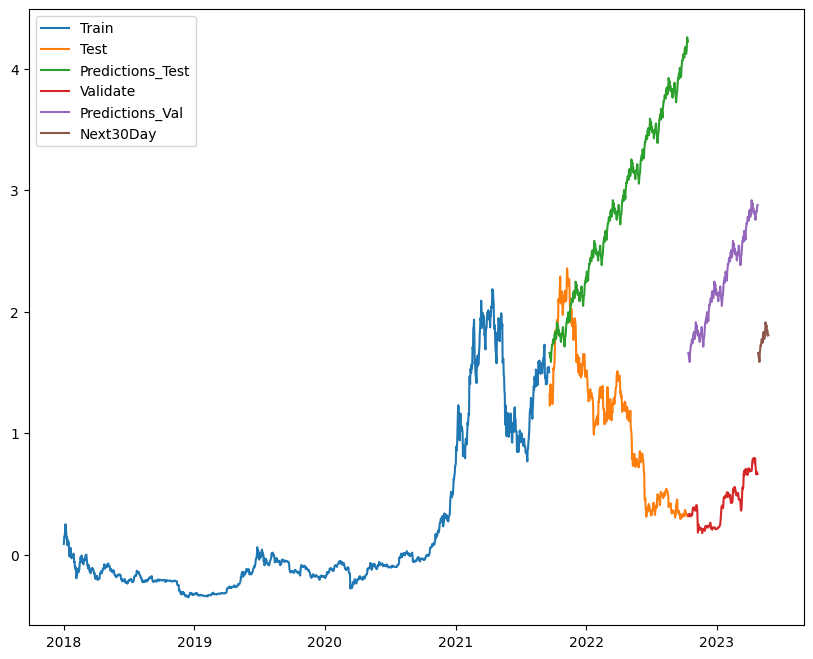

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data1.index, train_data)
plt.plot(test_data1.index, test_data)
plt.plot(test_data1.index, y_test_pred)
plt.plot(val_data1.index, val_data)
plt.plot(val_data1.index, y_val_pred)
plt.plot(dates,y_pred_30days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()

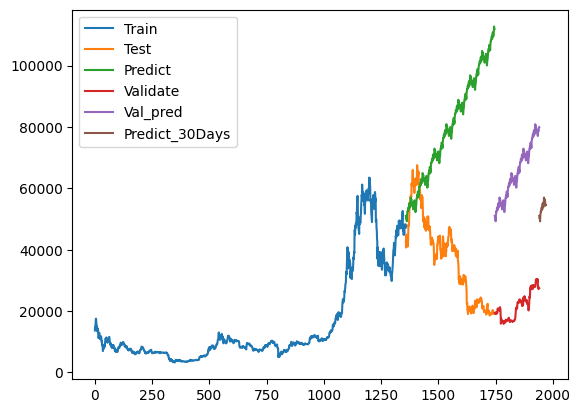

In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_test_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=len(df), step=1)
plt.plot(val_data_index,scaler.inverse_transform(y_val_pred))

prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(y_pred_30days))

plt.legend(['Train','Test','Predict','Validate','Val_pred','Predict_30Days'])
plt.show()

**Biểu đồ dự đoán 30 ngày với tỉ lệ 6:2:2**

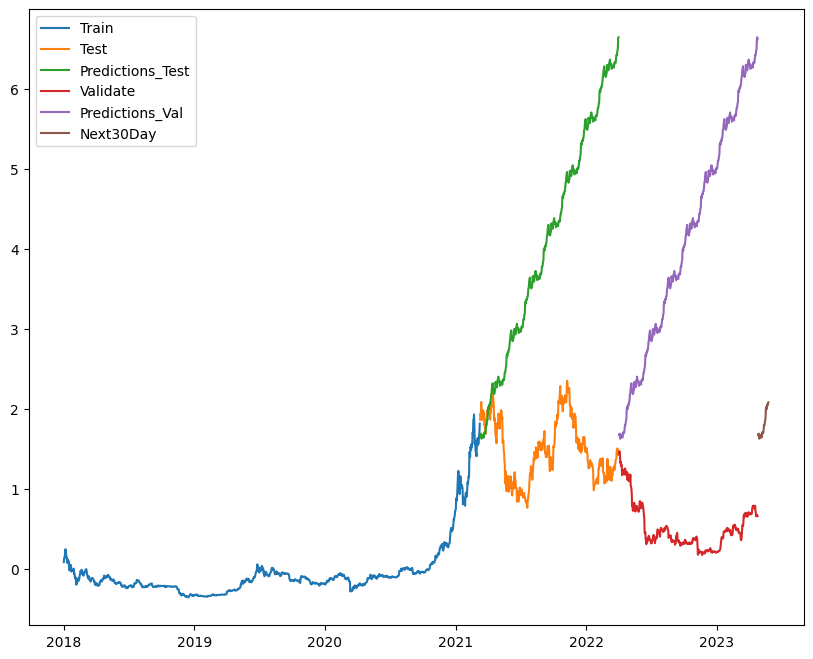

In [ ]:


# 9.Vẽ hình
plt.figure(figsize=(10,8))
plt.plot(train_data2.index, train_data)
plt.plot(test_data2.index, test_data)
plt.plot(test_data2.index, y_test_pred)
plt.plot(val_data2.index, val_data)
plt.plot(val_data2.index, y_val_pred)
plt.plot(dates,y_pred_30days)
plt.legend(['Train', 'Test', 'Predictions_Test','Validate','Predictions_Val','Next30Day'])
plt.show()